## Desafio Final - AceleraDev Data Science Codenation

### Análise exploratória: Análise de cluster

Autora: Jéssica Ramos

Junho/2020

O objetivo desse notebook é fazer uma análise de cluster exploratória de todas as empresas no mercado.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# leitura do dataset
mercado = pd.read_csv('./data/dados_mercado_final.csv')
mercado.shape

(462298, 56)

In [3]:
mercado.head(5)

,Unnamed: 0,id,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,...,fl_st_especial,fl_email,fl_telefone,fl_spa,fl_antt,fl_veiculo,fl_simples_irregular,fl_passivel_iss,uf_mesma_matriz,filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,1,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,1,0


O número de clusters será analisado por meio do *elbow method* utilizando o algoritmo k-Médias.

In [4]:
# calcula a soma dos quadrados dentro dos clusters
def calculate_wcss(data):
    wcss = list()
    
    for n in range(2, 31):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        
    return wcss

In [5]:
wcss_mercado = calculate_wcss(mercado.iloc[:, 2:])

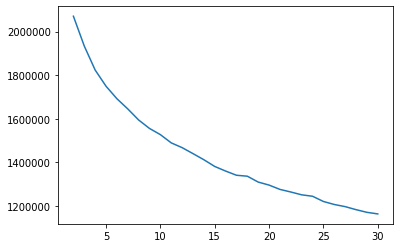

In [6]:
# plot
sns.lineplot(x=range(2, 31), y=wcss_mercado, estimator=None)

Com todas as variáveis o número de clusters parece ser muito grande. A segunda tentativa será feita com um subset de variáveis. Selecionei as variáveis que supus que teriam mais relação com o objetivo do projeto.

In [7]:
# subset de variáveis
variaveis = ['sg_uf_AC','sg_uf_AM','sg_uf_MA','sg_uf_PI','sg_uf_RN','sg_uf_RO',
             'natureza_juridica_macro_ADMINISTRACAO PUBLICA','natureza_juridica_macro_CARGO POLITICO',
             'natureza_juridica_macro_ENTIDADES EMPRESARIAIS','natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS',
             'natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS','natureza_juridica_macro_PESSOAS FISICAS',
             'setor_AGROPECUARIA','setor_COMERCIO','setor_CONSTRUÇÃO CIVIL','setor_INDUSTRIA','setor_SEM INFORMACAO',
             'setor_SERVIÇO','fl_rm_SIM','idade_empresa_anos','log_faturamento_estimado_aux',
             'log_faturamento_estimado_grupo_aux','filiais','uf_mesma_matriz']

In [8]:
wcss_mercado_subset = calculate_wcss(mercado.loc[:, variaveis])

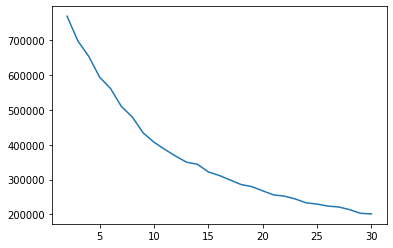

In [9]:
# plot
sns.lineplot(x=range(2, 31), y=wcss_mercado_subset, estimator=None)

Mesmo com o subset de variáveis, o número de clusters é muito grande.

In [10]:
# calcula a soma dos quadrados dentro dos clusters
def calculate_wcss2(data):
    wcss = list()
    
    for n in range(2, 51):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        
    return wcss

In [11]:
wcss_mercado_subset2 = calculate_wcss2(mercado.loc[:, variaveis])

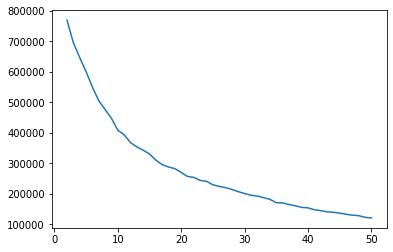

In [12]:
# plot
sns.lineplot(x=range(2, 51), y=wcss_mercado_subset2, estimator=None)

Mesmo testando até 50 clusters ainda não é possível identificar um cotovelo nos dados.

A ideia aqui era tentar identificar quantos perfis diferentes de empresas existem no mercado para, então, usar esse número como limite para o número de perfis de clientes de uma empresa X. Como essa abordagem não obteve bons resultados, vou tentar identificar o número de clusters existentes no portfolio das empresas 1, 2 e 3.

In [13]:
# empresa 1
empresa1 = pd.read_csv('./data/estaticos_portfolio1.csv')

Será utilizado aqui o subset de variáveis selecionado acima.

In [14]:
dados_empresa1 = mercado.loc[mercado['id'].isin(empresa1['id']), variaveis]

Como aqui a base de dados é menor, utilizarei um intervalo maior de número de clusters, pois o tempo de processamento não é muito grande.

In [17]:
# calcula a soma dos quadrados dentro dos clusters
def calculate_wcss3(data):
    wcss = list()
    
    for n in range(2, 101):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        
    return wcss

In [18]:
wcss_empresa1 = calculate_wcss3(dados_empresa1)

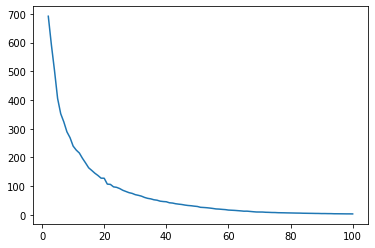

In [19]:
# plot
sns.lineplot(x=range(2, 101), y=wcss_empresa1, estimator=None)

Aqui é possível identificar um número ótimo de clusters por volta do valor 20. Em seguida será calculado o valor exato. Antes, farei o mesmo para as outras duas empresas.

In [20]:
# empresa 2
empresa2 = pd.read_csv('./data/estaticos_portfolio2.csv')

In [21]:
dados_empresa2 = mercado.loc[mercado['id'].isin(empresa2['id']), variaveis]

In [22]:
wcss_empresa2 = calculate_wcss3(dados_empresa2)

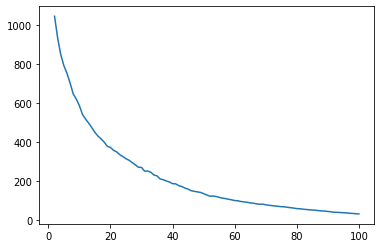

In [23]:
# plot
sns.lineplot(x=range(2, 101), y=wcss_empresa2, estimator=None)

Aqui o cotovelo é um pouco menos claro mas ainda visível.

In [24]:
# empresa 3
empresa3 = pd.read_csv('./data/estaticos_portfolio3.csv')

In [25]:
dados_empresa3 = mercado.loc[mercado['id'].isin(empresa3['id']), variaveis]

In [26]:
wcss_empresa3 = calculate_wcss3(dados_empresa3)

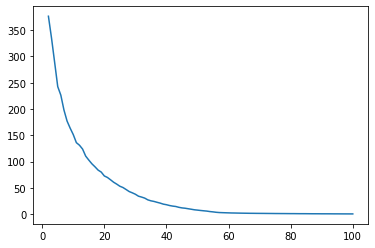

In [27]:
# plot
sns.lineplot(x=range(2, 101), y=wcss_empresa3, estimator=None)

Aqui também dá para identificar um cotovelo por volta de 20 clusters.

Agora vou calcular o número ótimo exato para cada uma das 3 empresas. Esse cálculo é feito calculando a maior distância entre a curva e a reta que liga os extremos da curva.

In [52]:
def numero_otimo_clusters(val_curva):
    
    # pega os valores extremos da curva
    x_min = 2
    y_min = val_curva[0]
    x_max = 100
    y_max = val_curva[-1]
    
    # coeficiente angular
    m = (y_max-y_min)/(x_max-x_min)
    
    # calcula os valores da reta
    x = list(range(2,101))
    y = [0] * 99
    
    for i in x:
        y[i-2] = y_min + m*(x[i-2] - x_min)
        
    # calcula a diferença entre a reta e a curva
    dif = [0] * 99
    
    for j in range(0,99):
        dif[j] = y[j] - val_curva[j]
    
    
    # encontra o valor de x cuja diferença é a maior
    index = dif.index(max(dif))
    
    return x[index]

In [53]:
# empresa 1
n_empresa1 = numero_otimo_clusters(wcss_empresa1)
print(n_empresa1)

21


In [54]:
# empresa 2
n_empresa2 = numero_otimo_clusters(wcss_empresa2)
print(n_empresa2)

29


In [55]:
# empresa 3
n_empresa3 = numero_otimo_clusters(wcss_empresa3)
print(n_empresa3)

23


Para essas 3 empresas, o número ótimo de clusters ficou entre 20 e 30.

O objetivo dessa análise era identificar o número aproximado de clusters existentes dentre os clientes de uma empresa X. Esse número, então, será utilizado para a criação de perfis no sistema de recomendação.

Ao invés de calcular apenas um perfil, será calculado um perfil por cluster (o centroide do cluster). Assim, empresas não clientes que estiverem próximas de algum desses centroides serão consideradas possíveis clientes.